In [2]:
import nltk
import os
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import re
from preprocessing import replace_synonyms, custom_string_splitter
import string
from nltk.corpus import stopwords
from nltk import pos_tag
import spacy
from similarities import calculate_cosine_similarity, calculate_element_similarity, pad_vector
import gensim.downloader as api

In [130]:
nlp = spacy.load("models/en_core_web_lg/en_core_web_lg-3.7.1")
word2vec_model = api.load("word2vec-google-news-300")
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

/Users/anna/opt/anaconda3/lib/python3.8/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_lg' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.7.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
[nltk_data] Downloading package wordnet to /Users/anna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]   

True

In [187]:
spacy.cli.download("en_core_web_md")
nlp_md = spacy.load("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


/Users/anna/opt/anaconda3/lib/python3.8/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_md' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.7.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [109]:
from sentence_transformers import SentenceTransformer
transformer_model = SentenceTransformer('all-MiniLM-L6-v2')

In [123]:
#Запросы пользователей
user_prompts = [
    ["bedroom", "Large bedroom with double wood bed, two windows, dressing table, and picture."],
    ["bedroom", "Medium-sized bedroom with light red double bed, TV stand, glass doors, and white ceiling fan."],
    ["bedroom", "Small bedroom with black double bed, two wall lamps, and dark curtains."],
    ["bedroom", "A cozy bedroom with a beige double bed, TV, pouf, and spacious wardrobe"],
    ["bedroom", "I want a big room"],
    ["bathroom", "Medium bathroom, black washbasin, mirror, shelf, white bathtub, glass door, and brown blinds"],
    ["dining", "Show me a medium-sized dining area with a round glass table, six white chairs, white blinds, and beige curtains"],
    ["dining", "I want to see a medium-sized dining room with a grey table, seven grey chairs, two black chandeliers, a grey flowerpot, and a white sofa"],
    ["kitchen", "Show me a medium-sized kitchen with white cabinets, a sink, a black ceiling fan, a metallic hob, a white and black refrigerator, and a brown rug"],
    ["living room", "I want to see a large living room with a beige sofa, two beige armchairs, a beige pouf, a black coffee table, a black end table, a grey rug, two black wall lamps, and two paintings"]
]

In [116]:
#Вызов модели обученной на наших данных
res = start_of_experiment("bedroom", "Large bedroom with double wood, bed two windows, dressing table, and picture.",3)

[nltk_data] Downloading package wordnet to /Users/anna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


KeyError: "Key 'large bedroom' not present"

tok2vec, spacy
['bedroom', 'Large bedroom with double wood bed, two windows, dressing table, and picture.']


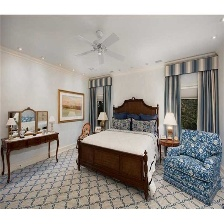

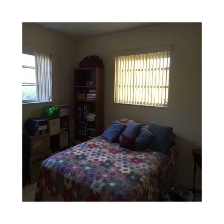

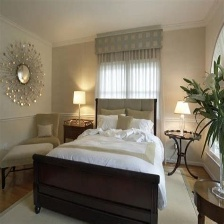

['bedroom', 'Medium-sized bedroom with light red double bed, TV stand, glass doors, and white ceiling fan.']


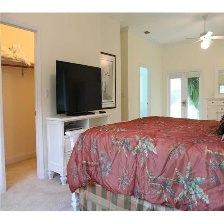

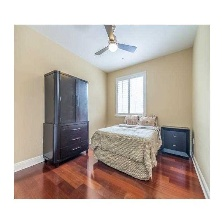

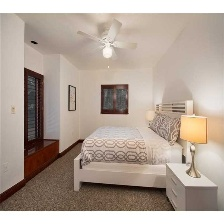

['bedroom', 'Small bedroom with black double bed, two wall lamps, and dark curtains.']


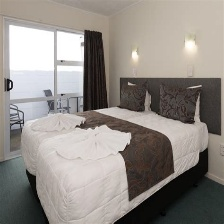

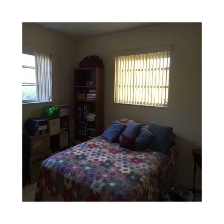

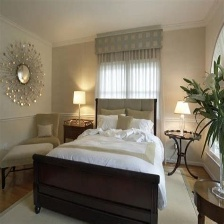

['bedroom', 'A cozy bedroom with a beige double bed, TV, pouf, and spacious wardrobe']


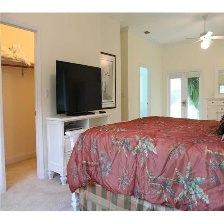

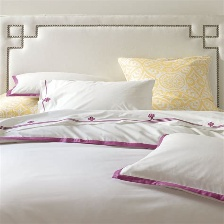

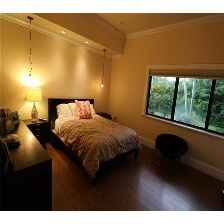

['bedroom', 'I want a big room']


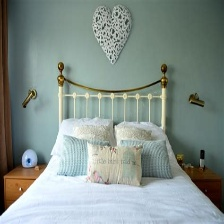

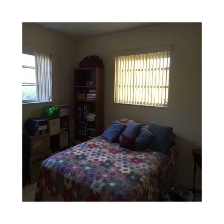

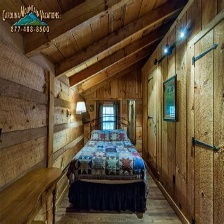

['bathroom', 'Medium bathroom, black washbasin, mirror, shelf, white bathtub, glass door, and brown blinds']


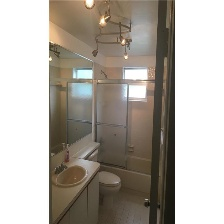

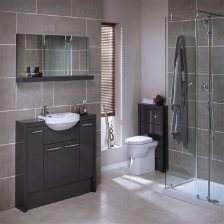

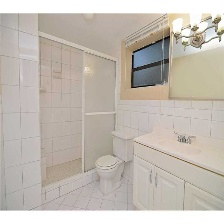

['dining', 'Show me a medium-sized dining area with a round glass table, six white chairs, white blinds, and beige curtains']


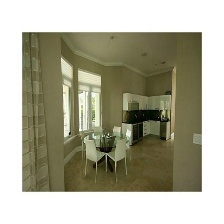

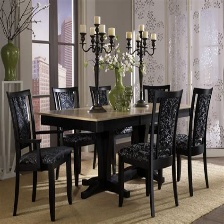

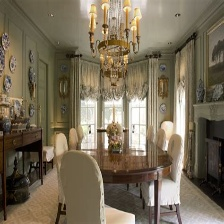

['dining', 'I want to see a medium-sized dining room with a grey table, seven grey chairs, two black chandeliers, a grey flowerpot, and a white sofa']


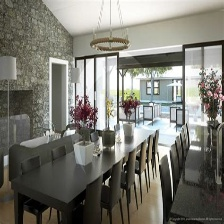

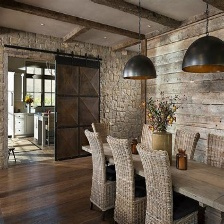

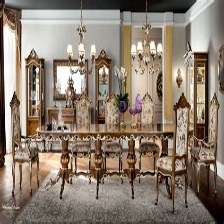

['kitchen', 'Show me a medium-sized kitchen with white cabinets, a sink, a black ceiling fan, a metallic hob, a white and black refrigerator, and a brown rug']


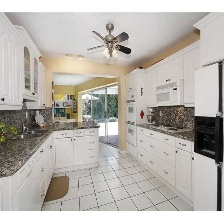

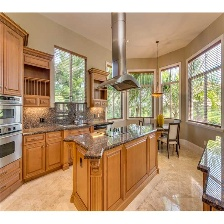

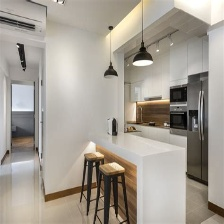

['living room', 'I want to see a large living room with a beige sofa, two beige armchairs, a beige pouf, a black coffee table, a black end table, a grey rug, two black wall lamps, and two paintings']


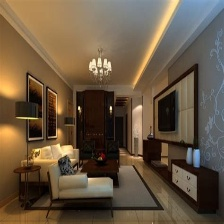

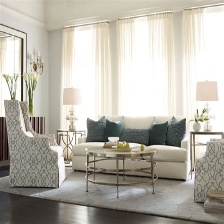

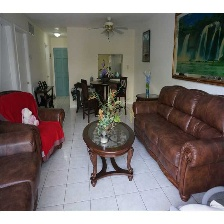

In [180]:
print("tok2vec, spacy")
for i in range(0,10):
    print(user_prompts[i])
    res = start_of_experiment(user_prompts[i][0],user_prompts[i][1],1)
    for i in res:
        display(Image(i['Image Path']))

In [ ]:
print("word2vec, google-news ")
for i in range(0,10):
    print(user_prompts[i])
    res = start_of_experiment(user_prompts[i][0],user_prompts[i][1],2)
    for i in res:
        display(Image(i['Image Path']))

tok2vec, spacy, en_core_web_md
['bedroom', 'Large bedroom with double wood bed, two windows, dressing table, and picture.']


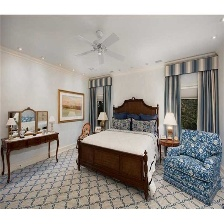

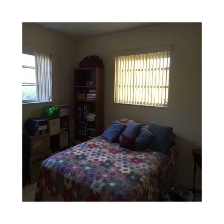

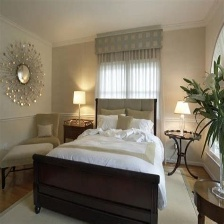

['bedroom', 'Medium-sized bedroom with light red double bed, TV stand, glass doors, and white ceiling fan.']


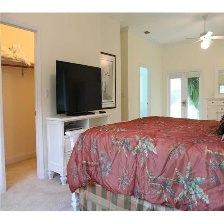

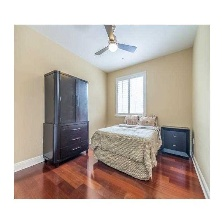

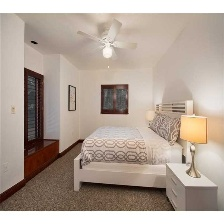

['bedroom', 'Small bedroom with black double bed, two wall lamps, and dark curtains.']


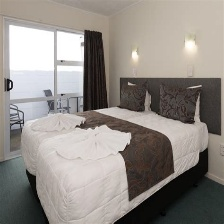

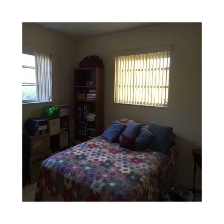

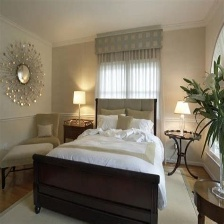

['bedroom', 'A cozy bedroom with a beige double bed, TV, pouf, and spacious wardrobe']


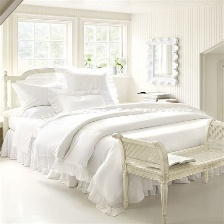

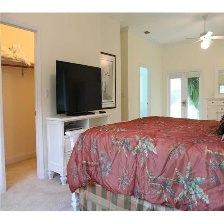

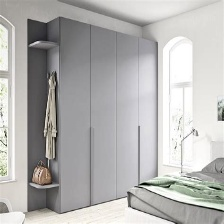

['bedroom', 'I want a big room']


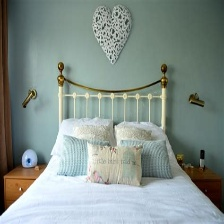

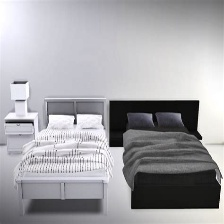

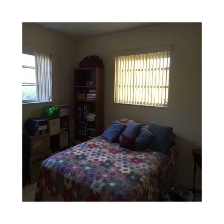

['bathroom', 'Medium bathroom, black washbasin, mirror, shelf, white bathtub, glass door, and brown blinds']


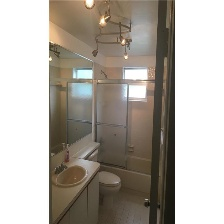

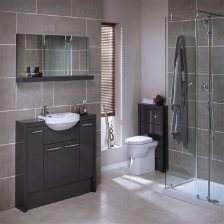

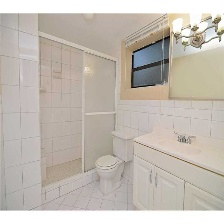

['dining', 'Show me a medium-sized dining area with a round glass table, six white chairs, white blinds, and beige curtains']


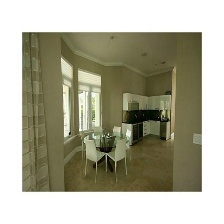

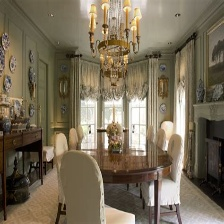

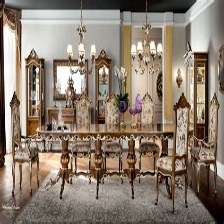

['dining', 'I want to see a medium-sized dining room with a grey table, seven grey chairs, two black chandeliers, a grey flowerpot, and a white sofa']


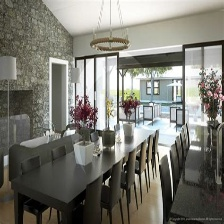

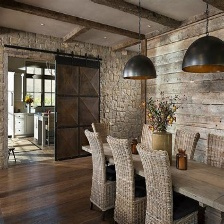

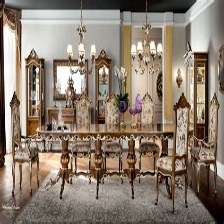

['kitchen', 'Show me a medium-sized kitchen with white cabinets, a sink, a black ceiling fan, a metallic hob, a white and black refrigerator, and a brown rug']


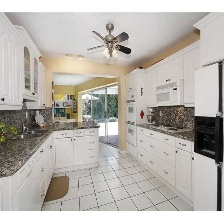

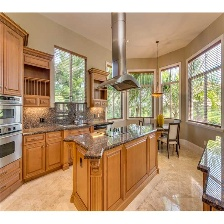

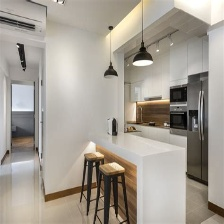

['living room', 'I want to see a large living room with a beige sofa, two beige armchairs, a beige pouf, a black coffee table, a black end table, a grey rug, two black wall lamps, and two paintings']


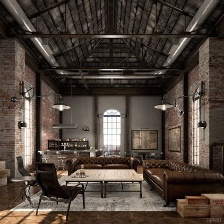

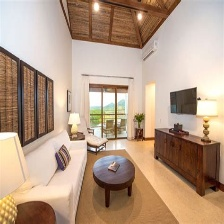

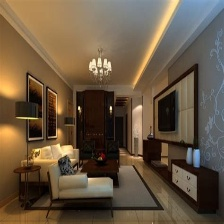

In [189]:
print("tok2vec, spacy, en_core_web_md")
for i in range(0,10):
    print(user_prompts[i])
    res = start_of_experiment(user_prompts[i][0],user_prompts[i][1],5)
    for i in res:
        display(Image(i['Image Path']))

In [5]:
bedroom_files, bedrooms, living_rooms_files, living_rooms, kitchens_files, kitchens, dining_files, dining, bathroom_files, bathrooms = load_files()

In [45]:
#w2v модель обучение на собственных данных
from gensim.models import Word2Vec
import multiprocessing
def get_w2v_model(rooms):
    #word to vec CBOW
    cores = multiprocessing.cpu_count() 
    w2v_model = Word2Vec(min_count=2,
                         window=2,
                         sg = 0,
                         sample=6e-5, 
                         alpha=0.03, 
                         min_alpha=0.0007, 
                         negative=20,
                         workers=cores-1)
    w2v_model.build_vocab(rooms)
    return w2v_model
rooms = bedrooms + living_rooms + kitchens + dining + bathrooms

In [46]:
w2v_model_on_our_data = get_w2v_model(rooms)

In [149]:
def start_of_experiment(room_input, user_input, n = 0):
    room_input = room_input.lower()
    user_input = user_input.lower()

    if room_input == 'bedroom':
        top_results = find_similar_rooms(user_input, bedrooms, bedroom_files, 'pictures/Bedroom/',n)
    elif room_input == 'living room':
        top_results = find_similar_rooms(user_input, living_rooms, living_rooms_files, 'pictures/Livingroom/',n)
    elif room_input == 'kitchen':
        top_results = find_similar_rooms(user_input, kitchens, kitchens_files, 'pictures/Kitchen/',n)
    elif room_input == 'bathroom':
        top_results = find_similar_rooms(user_input, bathrooms, bathroom_files, 'pictures/Bathroom/',n)
    elif room_input == 'dining':
        top_results = find_similar_rooms(user_input, dining, dining_files, 'pictures/Dining/',n)
    return top_results 

In [188]:
def get_vector_representation(vector, number_of_model):
    vec = []
    if number_of_model == 1:
        #модель tok2vec, 40 mb, written text (blogs, news, comments)
        
        for phrase in vector:
            tokens = nlp(phrase)
            for token in tokens:
                word = token.text
                if word in nlp.vocab:
                    vec.extend(nlp(word).vector)
                    
    if number_of_model == 2:
        #google news, 1,6 gb
        
        for phrase in vector:
            tokens = nlp(phrase)
            for token in tokens:
                word = token.text
                if word in word2vec_model:
                    vec.extend(word2vec_model[word])
                    
                    
    if number_of_model == 3: 
        #модель обученная на наших данных
        for word in vector:
            vector = w2v_model_on_our_data.wv[word]
    if number_of_model == 5:
        for phrase in vector:
            tokens = nlp_md(phrase)
            for token in tokens:
                word = token.text
                if word in nlp_md.vocab:
                    vec.extend(nlp_md(word).vector)
    return vec

In [173]:
user_input = "big bed"
top_results = find_similar_rooms(user_input, kitchens, kitchens_files, 'pictures/Kitchen/', 1)

ngram ['small', 'black chair', 'sink', 'metallic refrigerator', 'white cabinet', 'grey & black oven', 'metallic microwave', 'white toaster;\n']
phrase small
small
phrase black chair
black
chair
phrase sink
sink
phrase metallic refrigerator
metallic
refrigerator
phrase white cabinet
white
cabinet
phrase grey & black oven
grey
&
black
oven
phrase metallic microwave
metallic
microwave
phrase white toaster;

white
toaster;
ngram ['small', 'sink', 'metallic red cabinet', 'metallic oven', 'metallic microwave;\n']
phrase small
small
phrase sink
sink
phrase metallic red cabinet
metallic
red
cabinet
phrase metallic oven
metallic
oven
phrase metallic microwave;

metallic
microwave;
ngram ['medium', ';white cabinet', 'sink', 'black ceiling fan', 'metallic hob', 'white & black refrigerator', 'brown rug;\n']
phrase medium
medium
phrase ;white cabinet
;white
cabinet
phrase sink
sink
phrase black ceiling fan
black
ceiling
fan
phrase metallic hob
metallic
hob
phrase white & black refrigerator
white
&


In [177]:
top_results[0]['Image Path']

'pictures/Kitchen/kitchen_24.jpg'

In [179]:
def find_similar_rooms(user_input, room_type, type_files, path_beg, number_of_model = 0):
    labeled_data = [word for ngram in room_type for phrase in ngram for word in phrase.split()]
    user_input = replace_synonyms(user_input, labeled_data)
    user_string = custom_string_splitter(user_input)
    
    if number_of_model == 4:
        user_vec = transformer_model.encode(user_string)
        vecs = transformer_model.encode(room_type)
    else:
        user_vec = get_vector_representation(user_string, number_of_model)
        vecs = []
        max_dimension = 0
        for i in range(len(room_type)):
            vector = get_vector_representation(room_type[i], number_of_model)
            if len(vector) > max_dimension:
                max_dimension = len(vector)
            vecs.append(vector)

        for i in range(len(vecs)):
            if max_dimension < len(user_vec):
                max_dimension = len(user_vec)
            vecs[i] = pad_vector(vecs[i], max_dimension)
        user_vec = pad_vector(user_vec, max_dimension)
    
    element_similarities = []
    vector_similarities = []
    for i in range(len(vecs)):
        if number_of_model == 4:
            vector_similarities.append(calculate_cosine_similarity(user_vec, vecs[i]))
            overall_similarities = vector_similarities
        else:
            element_similarities.append(calculate_element_similarity(set(user_vec), set(vecs[i])))
            vector_similarities.append(calculate_cosine_similarity(user_vec, vecs[i]))
            overall_similarities = [0.5 * vector_sim + 0.5  * element_sim for vector_sim, element_sim in zip(vector_similarities, element_similarities)]
    results = [
        {"Similarity": overall_similarities[idx], "File Name": type_files[idx]}
        for idx in range(len(overall_similarities))
    ]
    for result in results:
        filename = result["File Name"]
        image_path = os.path.join(path_beg, filename)
        result["Image Path"] = image_path
    results.sort(key=lambda x: x["Similarity"], reverse=True)
    top_results = results[:3]
        
    return top_results

In [4]:
def load_files():
    with open('labelled_bedrooms_data_sample.txt.txt') as f:
        bedrooms_lines = f.readlines()
    with open('labelled_living_rooms_data_sample.txt.txt') as f:
        living_rooms_lines = f.readlines()
    with open('labelled_kitchens_data_sample.txt.txt') as f:
        kitchens_lines = f.readlines()
    with open('labelled_dining_data_sample.txt.txt') as f:
        dining_lines = f.readlines()
    with open('labelled_bathrooms_data_sample.txt.txt') as f:
        bathrooms_lines = f.readlines()
    bedroom_files = []
    for bedroom_line in bedrooms_lines:
        bedroom_files.append(bedroom_line.split("; ")[0])
    bedrooms = []
    for bedroom_line in bedrooms_lines:
        bedrooms.append(bedroom_line.split("; ")[2:])
    living_rooms_files = []
    for living_room_line in living_rooms_lines:
        living_rooms_files.append(living_room_line.split("; ")[0])
    living_rooms = []
    for living_room_line in living_rooms_lines:
        living_rooms.append(living_room_line.split("; ")[2:])
    kitchens_files = []
    for kitchen_line in kitchens_lines:
        kitchens_files.append(kitchen_line.split("; ")[0])
    kitchens = []
    for kitchen_line in kitchens_lines:
        kitchens.append(kitchen_line.split("; ")[2:])
    dining_files = []
    for dining_line in dining_lines:
        dining_files.append(dining_line.split("; ")[0])
    dining = []
    for dining_line in dining_lines:
        dining.append(dining_line.split("; ")[2:])
    bathroom_files = []
    for bathroom_line in bathrooms_lines:
        bathroom_files.append(bathroom_line.split("; ")[0])
    bathrooms = []
    for bathroom_line in bathrooms_lines:
        bathrooms.append(bathroom_line.split("; ")[2:])
        
    return bedroom_files, bedrooms, living_rooms_files, living_rooms, kitchens_files, kitchens, dining_files, dining, bathroom_files, bathrooms